# 1.데이터의 확인과 실행

In [1]:
# 라이브러리 호출
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# 시드값 고정
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
# 데이터 불러오기
df_pre = pd.read_csv('./data/wine.csv', header=None)
df = df_pre.sample(frac=1) # 불러온 데이터에서 일부만 가져옴, frac은 0부터1까지
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
3103,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,0
1419,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,1
4761,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,0
4690,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,0
4032,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 3103 to 860
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6497 non-null   float64
 1   1       6497 non-null   float64
 2   2       6497 non-null   float64
 3   3       6497 non-null   float64
 4   4       6497 non-null   float64
 5   5       6497 non-null   float64
 6   6       6497 non-null   float64
 7   7       6497 non-null   float64
 8   8       6497 non-null   float64
 9   9       6497 non-null   float64
 10  10      6497 non-null   float64
 11  11      6497 non-null   int64  
 12  12      6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [6]:
# 데이터를 넘파이 배열로 변환, 타겟 분리
dataset = df.values
X = dataset[:,:-1].astype('float')
y = dataset[:,-1]

X.shape, y.shape

((6497, 12), (6497,))

In [7]:
# 모델 구성, 컴파일, 실행
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=200, batch_size=200)

Epoch 1/200
33/33 [==============================] - 1s 3ms/step - loss: 4.9407 - accuracy: 0.2860
Epoch 2/200
33/33 [==============================] - 0s 4ms/step - loss: 0.4123 - accuracy: 0.8081
Epoch 3/200
33/33 [==============================] - 0s 4ms/step - loss: 0.2692 - accuracy: 0.8766
Epoch 4/200
33/33 [==============================] - 0s 3ms/step - loss: 0.2242 - accuracy: 0.9207
Epoch 5/200
33/33 [==============================] - 0s 4ms/step - loss: 0.2136 - accuracy: 0.9269
Epoch 6/200
33/33 [==============================] - 0s 4ms/step - loss: 0.2091 - accuracy: 0.9298
Epoch 7/200
33/33 [==============================] - 0s 4ms/step - loss: 0.2054 - accuracy: 0.9300
Epoch 8/200
33/33 [==============================] - 0s 5ms/step - loss: 0.2025 - accuracy: 0.9309
Epoch 9/200
33/33 [==============================] - 0s 4ms/step - loss: 0.2003 - accuracy: 0.9317
Epoch 10/200
33/33 [==============================] - 0s 5ms/step - loss: 0.1982 - accuracy: 0.9317
Epoch 11/

33/33 [==============================] - 0s 3ms/step - loss: 0.0569 - accuracy: 0.9825
Epoch 84/200
33/33 [==============================] - 0s 3ms/step - loss: 0.0547 - accuracy: 0.9832
Epoch 85/200
33/33 [==============================] - 0s 2ms/step - loss: 0.0551 - accuracy: 0.9826
Epoch 86/200
33/33 [==============================] - 0s 2ms/step - loss: 0.0564 - accuracy: 0.9831
Epoch 87/200
33/33 [==============================] - 0s 2ms/step - loss: 0.0540 - accuracy: 0.9828
Epoch 88/200
33/33 [==============================] - 0s 2ms/step - loss: 0.0535 - accuracy: 0.9835
Epoch 89/200
33/33 [==============================] - 0s 2ms/step - loss: 0.0544 - accuracy: 0.9835
Epoch 90/200
33/33 [==============================] - 0s 2ms/step - loss: 0.0531 - accuracy: 0.9843
Epoch 91/200
33/33 [==============================] - 0s 2ms/step - loss: 0.0540 - accuracy: 0.9843
Epoch 92/200
33/33 [==============================] - 0s 2ms/step - loss: 0.0521 - accuracy: 0.9838
Epoch 93/200


33/33 [==============================] - 0s 2ms/step - loss: 0.0477 - accuracy: 0.9857
Epoch 165/200
33/33 [==============================] - 0s 2ms/step - loss: 0.0474 - accuracy: 0.9861
Epoch 166/200
33/33 [==============================] - 0s 2ms/step - loss: 0.0456 - accuracy: 0.9858
Epoch 167/200
33/33 [==============================] - 0s 2ms/step - loss: 0.0465 - accuracy: 0.9869
Epoch 168/200
33/33 [==============================] - 0s 2ms/step - loss: 0.0551 - accuracy: 0.9832
Epoch 169/200
33/33 [==============================] - 0s 2ms/step - loss: 0.0496 - accuracy: 0.9848
Epoch 170/200
33/33 [==============================] - 0s 2ms/step - loss: 0.0496 - accuracy: 0.9848
Epoch 171/200
33/33 [==============================] - 0s 2ms/step - loss: 0.0481 - accuracy: 0.9855
Epoch 172/200
33/33 [==============================] - 0s 2ms/step - loss: 0.0454 - accuracy: 0.9854
Epoch 173/200
33/33 [==============================] - 0s 2ms/step - loss: 0.0480 - accuracy: 0.9857
Epoc

In [8]:
# 결과 출력
print(f'Accuracy : {model.evaluate(X,y)[1]:.4f}')

204/204 [==============================] - 1s 2ms/step - loss: 0.0426 - accuracy: 0.9869
Accuracy : 0.9869


# 2.모델 업데이트하기


- 모델을 에포크마다 모델의 정확도를 기록하며 저장

In [10]:
import os

# 모델이 저장될 디렉토리 지정
Model_dir = './model'#모델을 저장하는 폴더

if not os.path.exists(Model_dir):#만일 위의 폴더가 존재하지 않으면
    os.mkdir(Model_dir)#이 이름의 폴더를 만들어 줌

In [11]:
# 모델 저장 조건 설정
modelpath = './model/{epoch:02d}_{val_loss:.4f}.hdf5' # 모델 저장 경로 지정
checkpointer = ModelCheckpoint(filepath=modelpath,
                               monitor='val_loss',
                               verbose=1,
                               save_best_only=True) # 결과가 개선될때만 저장함

In [12]:
# 모델 실행 및 저장
model.fit(X, y, validation_split=0.2, epochs=200, batch_size=200, verbose=0, callbacks=[checkpointer])


Epoch 1: val_loss improved from inf to 0.04714, saving model to ./model\01_0.0471.hdf5

Epoch 2: val_loss improved from 0.04714 to 0.03519, saving model to ./model\02_0.0352.hdf5

Epoch 3: val_loss improved from 0.03519 to 0.03516, saving model to ./model\03_0.0352.hdf5

Epoch 4: val_loss improved from 0.03516 to 0.03514, saving model to ./model\04_0.0351.hdf5

Epoch 5: val_loss did not improve from 0.03514

Epoch 6: val_loss did not improve from 0.03514

Epoch 7: val_loss did not improve from 0.03514

Epoch 8: val_loss did not improve from 0.03514

Epoch 9: val_loss did not improve from 0.03514

Epoch 10: val_loss did not improve from 0.03514

Epoch 11: val_loss improved from 0.03514 to 0.03492, saving model to ./model\11_0.0349.hdf5

Epoch 12: val_loss improved from 0.03492 to 0.03391, saving model to ./model\12_0.0339.hdf5

Epoch 13: val_loss did not improve from 0.03391

Epoch 14: val_loss did not improve from 0.03391

Epoch 15: val_loss did not improve from 0.03391

Epoch 16: val


Epoch 162: val_loss did not improve from 0.03391

Epoch 163: val_loss did not improve from 0.03391

Epoch 164: val_loss did not improve from 0.03391

Epoch 165: val_loss did not improve from 0.03391

Epoch 166: val_loss did not improve from 0.03391

Epoch 167: val_loss did not improve from 0.03391

Epoch 168: val_loss did not improve from 0.03391

Epoch 169: val_loss did not improve from 0.03391

Epoch 170: val_loss did not improve from 0.03391

Epoch 171: val_loss did not improve from 0.03391

Epoch 172: val_loss did not improve from 0.03391

Epoch 173: val_loss did not improve from 0.03391

Epoch 174: val_loss did not improve from 0.03391

Epoch 175: val_loss did not improve from 0.03391

Epoch 176: val_loss did not improve from 0.03391

Epoch 177: val_loss did not improve from 0.03391

Epoch 178: val_loss did not improve from 0.03391

Epoch 179: val_loss did not improve from 0.03391

Epoch 180: val_loss did not improve from 0.03391

Epoch 181: val_loss did not improve from 0.03391


# 3.그래프로 확인

In [13]:
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X, y, validation_split=0.33, epochs=2000, batch_size=200, verbose=0)

In [14]:
y_vloss = history.history['val_loss'] # 검증데이터에 대한 loss 
y_acc = history.history['val_accuracy'] # 검증데이터에 대한 accuracy

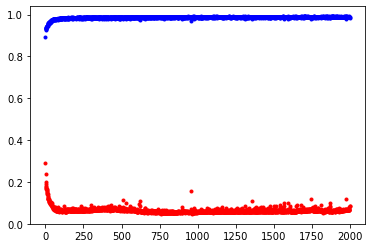

In [15]:
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, 'o', c='r', markersize=3)
plt.plot(x_len, y_acc, 'o', c='b', markersize=3)

# 4.학습의 자동 중단

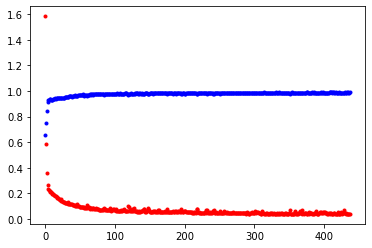

In [16]:
from keras.callbacks import EarlyStopping

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X, y, validation_split=0.33, epochs=2000, batch_size=200, verbose=0, callbacks=[early_stopping_callback])
y_vloss = history.history['val_loss'] # 검증데이터에 대한 loss 
y_acc = history.history['val_accuracy'] # 검증데이터에 대한 accuracy
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, 'o', c='r', markersize=3)
plt.plot(x_len, y_acc, 'o', c='b', markersize=3)

# 위와 비교하면 위는 빨간 선(val_loss)이 다시 올라가는것처럼 보이지만 아래에서는 다시 증가하는 경향이 보이지 않는다